# Introduction :- 

### The Dataset appears to represent the viewing preferences of individuals for certain movies. Each row corresponds to a person's movie-watching history, and each column represents a different movie.

### The columns are labeled as follows:

+ "V1" to "V5" represent some unspecified categorical variables.
+ "Sixth Sense," "Gladiator," "LOTR1," "Harry Potter1," "Patriot," "LOTR2," "Harry Potter2," "LOTR," "Braveheart," and "Green Mile" are movie titles.
## For each person (row), there are values indicating whether they have watched a particular movie or not:

+ A "1" typically indicates that the person has watched the movie.
+ A "0" typically indicates that the person has not watched the movie.
#### For example, in the first row:

#### The person has watched "Sixth Sense," "LOTR1," "Harry Potter1," "Green Mile," and "LOTR2."
+ In the second row:
#### The person has watched "Gladiator," "Patriot," and "Braveheart." etc..

## Objective :- 
#### To prepare assosiation rules for the data set
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

## Working Summary :- 
1. The Data is first preprocessed to bring it in suitable form
2. Frequent item lists are prepared for min_support values of 0.5,0.4,0.3. Tree map plot is prepared for each support values.
3. Association rules are created, and further modifications to the rules are made as deemed appropriate, eventually leading to finalization.
4. Finally, a scatter plot between the Support and Confidence values of all the finalized model is created to conclude.

## Libraries and Data Imports

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import squarify

In [3]:
data = pd.read_csv("my_movies.csv")
data.head(3)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0


## Data Preprocessing :- 

In [4]:
data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


### Columns V3, V4 and V5 have null values but these columns have 'object' data which we are not going to consider when we establish assosiation relation. Further, columns with 'integer' data type donot have any null value  

In [6]:
data.shape

(10, 15)

In [7]:
transactions = data.iloc[:, 5:].applymap(bool).values.tolist()

In [8]:
transactions

[[True, False, True, True, False, True, False, False, False, True],
 [False, True, False, False, True, False, False, False, True, False],
 [False, False, True, False, False, True, False, False, False, False],
 [True, True, False, False, True, False, False, False, False, False],
 [True, True, False, False, True, False, False, False, False, False],
 [True, True, False, False, True, False, False, False, False, False],
 [False, False, False, True, False, False, True, False, False, False],
 [False, True, False, False, True, False, False, False, False, False],
 [True, True, False, False, True, False, False, False, False, False],
 [True, True, False, False, False, False, False, True, False, True]]

In [9]:
data_columns = data.columns.to_list()
trans_dim = data_columns[5:]
trans_df = pd.DataFrame(transactions,columns=trans_dim)
trans_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,True,False,True,True,False,True,False,False,False,True
1,False,True,False,False,True,False,False,False,True,False
2,False,False,True,False,False,True,False,False,False,False
3,True,True,False,False,True,False,False,False,False,False
4,True,True,False,False,True,False,False,False,False,False
5,True,True,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,True,False,False,False
7,False,True,False,False,True,False,False,False,False,False
8,True,True,False,False,True,False,False,False,False,False
9,True,True,False,False,False,False,False,True,False,True


## Now are Data Frame is ready for apriori algorithm

### 1. The frequent list for a support >= 0.5

In [10]:
freq_list = apriori(trans_df,min_support = 0.5, use_colnames=True,)
freq_list

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Gladiator, Patriot)"


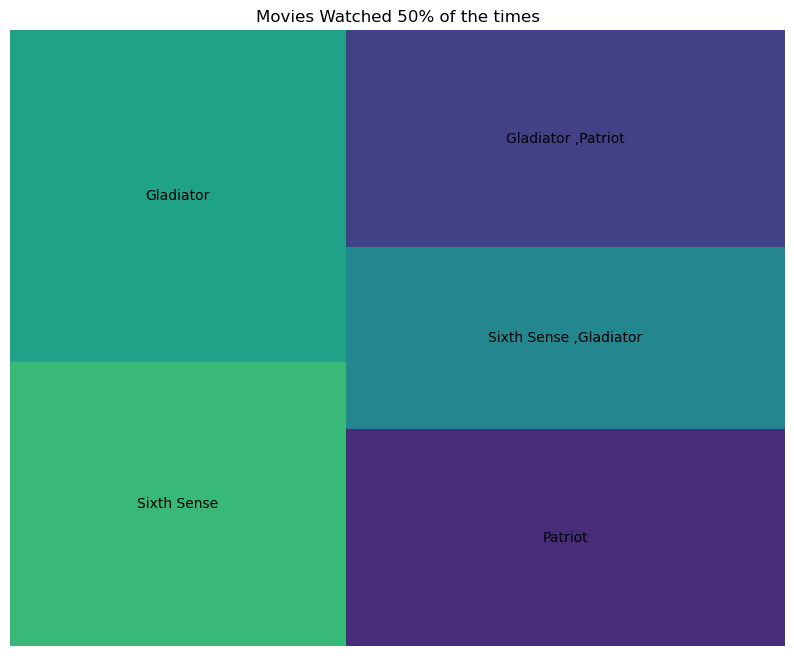

In [13]:
plt.figure(figsize=(10,8))
squarify.plot(freq_list['support'],label = freq_list['itemsets'].apply(lambda x : " ,".join(x)))
plt.axis('off')
plt.title("Movies Watched 50% of the times")
plt.show()

In [14]:
rule_1 = association_rules(freq_list,metric = 'lift',min_threshold=1.4)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


## Conviction(A→B)= infinity; means the rule is not very meaningful or useful, as there is no significant relationship between the two items in the rule.
+ Hence we reject Patriot → Gladiator rule

## Rule Cloud for assosiation rule selected finally for min_support value >= 0.5

In [15]:
rule_1 = rule_1[rule_1['confidence'] != 1]
rule_1 = rule_1.reset_index().drop('index',axis = 1)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0


## Finalized Rule :- 
### Gladiator → Patriot

### 2.The frequent list for a support >= 0.4 

In [16]:
freq_list2 = apriori(df = trans_df, min_support=0.4, use_colnames=True)
freq_list2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Sixth Sense, Gladiator, Patriot)"


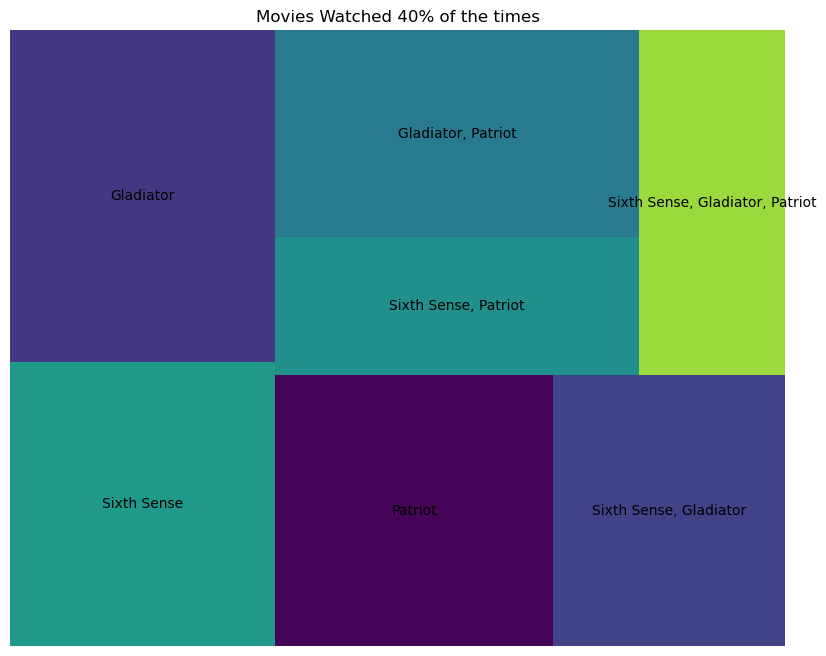

In [17]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=freq_list2['support'], label=freq_list2['itemsets'].apply(lambda x:", ".join(list(x))))
plt.title("Movies Watched 40% of the times")
plt.axis("off")
plt.show()

# Selecting the appropriate rule :-

In [18]:
rule_2 = association_rules(freq_list2)

In [19]:
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
3,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50


## Selection of appropriate rules

In [20]:
rule_2['num_antecedent'] = rule_2['antecedents'].apply(lambda x: len(x))
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedent
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40,1
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00,1
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75,1
3,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2


In [21]:
rule_2 = rule_2[(rule_2['confidence']  != 1) & (rule_2['num_antecedent']  != 1)]

## Rule Cloud for assosiation rule selected finally for min_support value >= 0.4

In [22]:
rule_2 = rule_2.reset_index().drop('index',axis =1)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedent
0,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.1,2.0,0.5,2


## Finalized Rule :- 
### (Sixth Sense and Gladiator) → Patriot

### 3.The frequent list for a support >= 0.3

In [23]:
freq_list3 = apriori(df = trans_df, min_support=0.3, use_colnames=True)
freq_list3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Sixth Sense, Gladiator, Patriot)"


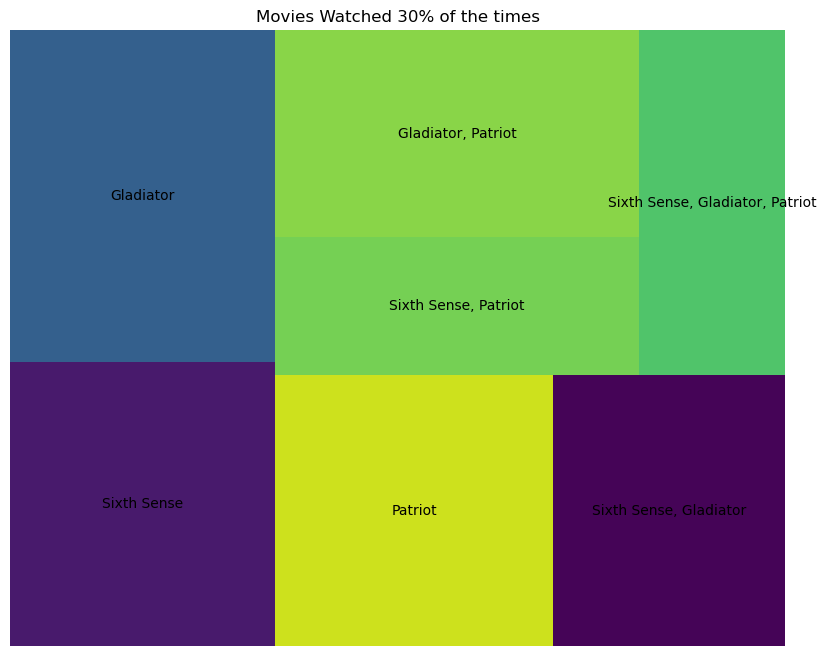

In [24]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=freq_list3['support'],label=freq_list3['itemsets'].apply(lambda x:", ".join(list(x))))
plt.title("Movies Watched 30% of the times")
plt.axis("off")
plt.show()

In [25]:
rule_3 = association_rules(df = freq_list3)

In [26]:
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
3,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50


In [27]:
rule_3[rule_3['confidence'] != 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.4
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
3,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.5


### We already have selected "Gladiator → Patriot " and "(Sixth Sense and Gladiator) → Patriot"

## Hence we select "Sixth Sense → Gladiator" as A leverage of 0.08 suggests a moderate level of association between the items in the rule.

In [28]:
rule_3 = rule_3[rule_3['leverage'] == min(rule_3['leverage'])]

## Rule Cloud for assosiation rule selected finally for min_support value >= 0.3

In [29]:
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.4


## Conclusion :- 
+ Following Assosiation rules are finalized

In [30]:
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0


In [31]:
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedent
0,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.1,2.0,0.5,2


In [32]:
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.4


In [33]:
supports = [rule_1['support'][0],rule_2['support'][0],rule_3['support'][0]]
confidences = [rule_1['confidence'][0],rule_2['confidence'][0],rule_3['confidence'][0]]
lifts = [rule_1['lift'][0],rule_2['lift'][0],rule_3['lift'][0]]

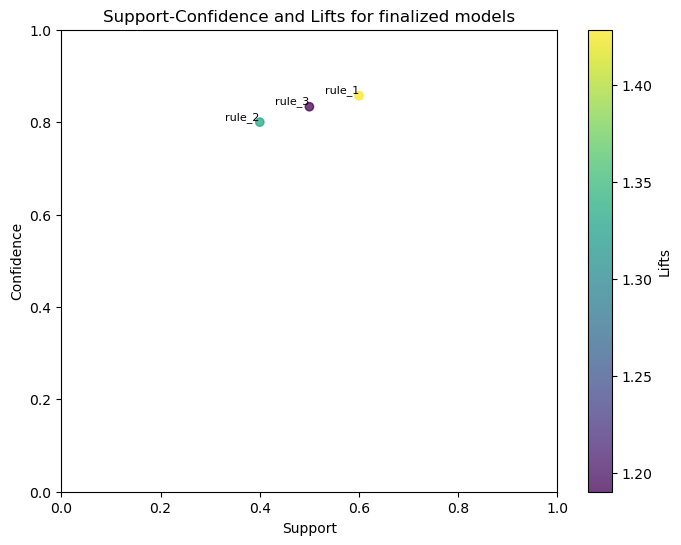

In [34]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=supports, y=confidences, c=lifts, cmap='viridis', alpha=0.75)

# Adding labels to each point
labels = ['rule_1', 'rule_2', 'rule_3']
for i, label in enumerate(labels):
    plt.text(supports[i], confidences[i], label, fontsize=8, ha='right', va='bottom')

# Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Lifts')

plt.title("Support-Confidence and Lifts for finalized models")
plt.xlabel('Support')
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Confidence')
plt.show()